In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Amazon sale Report.csv')

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.shape

(128976, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

## Data Cleaning

In [8]:
# drop un-necessary columns

df.drop(['fulfilled-by','New','PendingS'],axis=1,inplace=True)

In [9]:
df.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False


In [10]:
df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
dtype: int64

In [11]:
# drop the null values4

df.dropna(inplace=True)

In [12]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [13]:
df.shape

(121143, 18)

In [14]:
# check duplicates

df.duplicated().sum()

155

In [15]:
# remove duplicates

df.drop_duplicates(keep='first', inplace=True)

In [16]:
df.shape

(120988, 18)

In [17]:
# change the data type of date column

df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [19]:
df['ship-postal-code'].dtype

dtype('int32')

In [20]:
# rename the qty column as quantityd

df.rename(columns={'Qty':'Quantity'},inplace=True)

In [21]:
df.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False


In [22]:
df['ship-city'].unique().tolist()

['MUMBAI',
 'BENGALURU',
 'NAVI MUMBAI',
 'PUDUCHERRY',
 'CHENNAI',
 'GHAZIABAD',
 'CHANDIGARH',
 'HYDERABAD',
 'Chennai',
 'NOIDA',
 'Amravati.',
 'GUNTAKAL',
 'JAIPUR',
 'NEW DELHI',
 'Gurgaon',
 'TIRUCHIRAPPALLI',
 'pune',
 'TEZPUR',
 'RANCHI',
 'BILASPUR',
 'PUNE',
 'THIRUVARUR',
 'LUCKNOW',
 'VISAKHAPATNAM',
 'JEYPUR',
 'THIRUVANANTHAPURAM',
 'GREATER NOIDA',
 'JABALPUR',
 'KOLKATA',
 'ONGOLE',
 'SECUNDERABAD',
 'KEWALPUR',
 'CUTTACK',
 'BADLAPUR',
 'dimapur',
 'WARANGAL',
 'DHAULPUR',
 'GUWAHATI',
 'Bengaluru',
 'NAGPUR',
 'THANE',
 'VIJAPURA',
 'bangalore',
 'BERHAMPUR',
 'HIMMATNAGAR',
 'Kolkata',
 'DEHRADUN',
 'DHARMAPURI',
 'VADODARA',
 'CHAVAKKAD',
 'PATNA',
 'Jammu',
 'NARNAUND',
 'Ahmedabad',
 'AMBARNATH',
 'GWALIOR',
 'ROHTAK',
 'RAMAGUNDAM',
 'PITHORAGARH',
 'GUWAHATI, KAMRUP (M)',
 'KOLAR',
 'PATIALA',
 'REWA',
 'BONGAIGAON',
 'Chengalpattu',
 'PERAMBALUR',
 'VARANASI',
 'COIMBATORE',
 'CHIRMIRI',
 'KALYAN',
 'MYSORE',
 'BARABANKI',
 'AMILA',
 'VIJAYAWADA',
 'RAWAN AMBU

In [23]:
# we have city like PUNE and pune, so we make formatting consistent

df['ship-city'] = df['ship-city'].str.lower()

In [24]:
df['ship-state'] = df['ship-state'].str.lower()

In [25]:
# Define a mapping dictionary with incorrect spellings as keys and correct spelling as values
state_correction = {
    'rajsthan': 'rajasthan',
    'rj': 'rajasthan',
    'rajshthan': 'rajasthan',
    'nl' : 'nagaland',
    'orissa' : 'odisha',
    'punjab/mohali/zirakpur' : 'punjab',
     'pondicherry': 'puducherry',
    'pb' : 'punjab'
}

df['ship-state'] = df['ship-state'].replace(state_correction)

## Data Exploration

In [27]:
# calculate total sale. use the formull : total sale = amount * quantity

df['Total_sale'] = df['Quantity'] * df['Amount']

In [28]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Total_sale
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,mumbai,maharashtra,400081,IN,False,0.0
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,bengaluru,karnataka,560085,IN,False,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,navi mumbai,maharashtra,410210,IN,True,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,puducherry,puducherry,605008,IN,False,0.0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,chennai,tamil nadu,600073,IN,False,574.0


In [29]:
# group the total sale statewise

grp_state = df.groupby('ship-state')['Total_sale'].sum().sort_values(ascending=False).reset_index()

In [30]:
grp_state.head(15)

,ship-state,Total_sale
0,maharashtra,12921668.0
1,karnataka,10208746.0
2,telangana,6699150.0
3,uttar pradesh,6553145.0
4,tamil nadu,6322411.0
5,delhi,4192274.0
6,kerala,3633145.0
7,west bengal,3374305.0
8,andhra pradesh,3104348.0
9,haryana,2826408.0


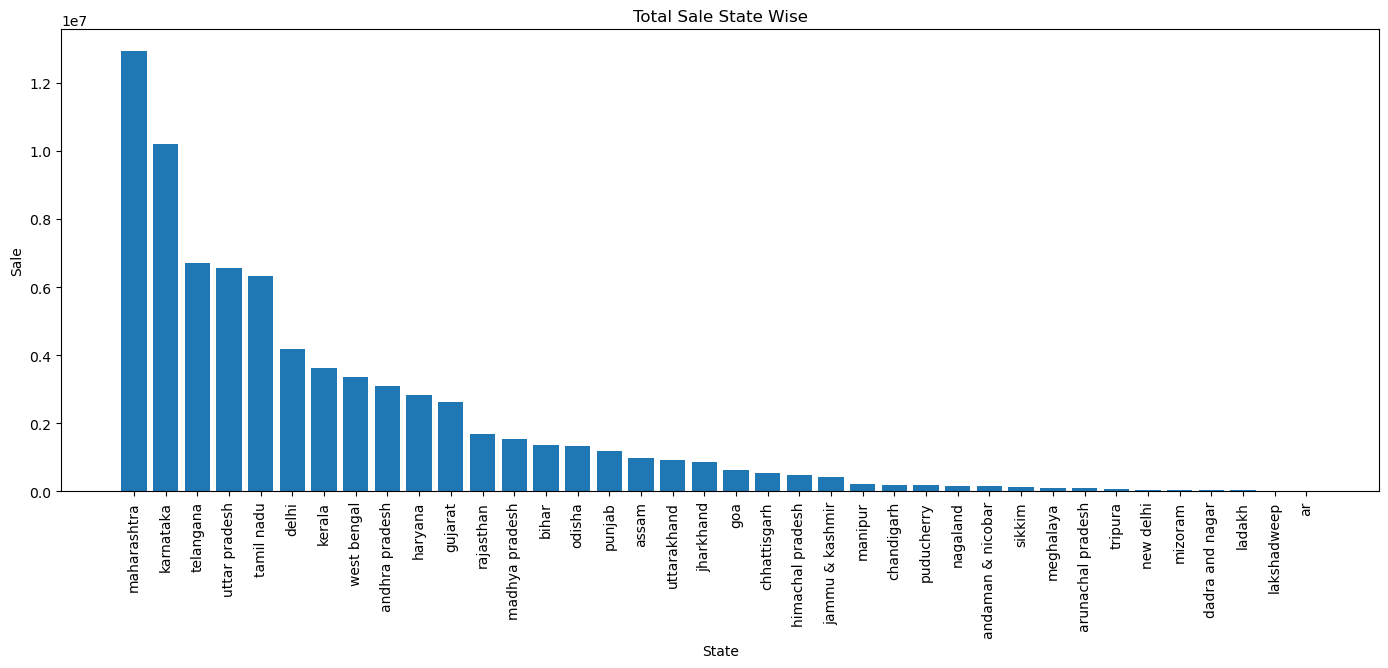

In [31]:

plt.figure(figsize=(17,6))
plt.bar(x = grp_state['ship-state'], height = grp_state['Total_sale'])
plt.xlabel('State')
plt.ylabel('Sale')
plt.title('Total Sale State Wise')
plt.xticks(rotation=90)
plt.show()

below are the top performing states with heighest sales
0 	maharashtra 	12921668.0
1 	karnataka 	10208746.0
2 	telangana 	6699150.0
3 	uttar pradesh 	6553145.0
4 	tamil nadu 	6322411.0
5 	delhi 	4192274.0
6 	kerala 	3633145.0
7 	west bengal 	3374305.0
8 	andhra pradesh 	3104348.0
9 	haryana 	2826408.0
10 	gujarat 	2627954.0
11 	rajasthan 	1690894.0
12 	madhya pradesh 	1528331.0
13 	bihar 	1358957.0
14 	odisha 	1333784.0
15 punjab

In [33]:
# top 15 citites with heighest sale

grp_city = df.groupby('ship-city')['Total_sale'].sum().sort_values(ascending=False).reset_index().head(15)

In [34]:
grp_city

,ship-city,Total_sale
0,bengaluru,7092535.0
1,hyderabad,5428255.0
2,mumbai,4166577.0
3,new delhi,3813813.0
4,chennai,3499976.0
5,pune,2716463.0
6,kolkata,1626874.0
7,gurugram,1249639.0
8,thane,1071452.0
9,lucknow,1006986.0


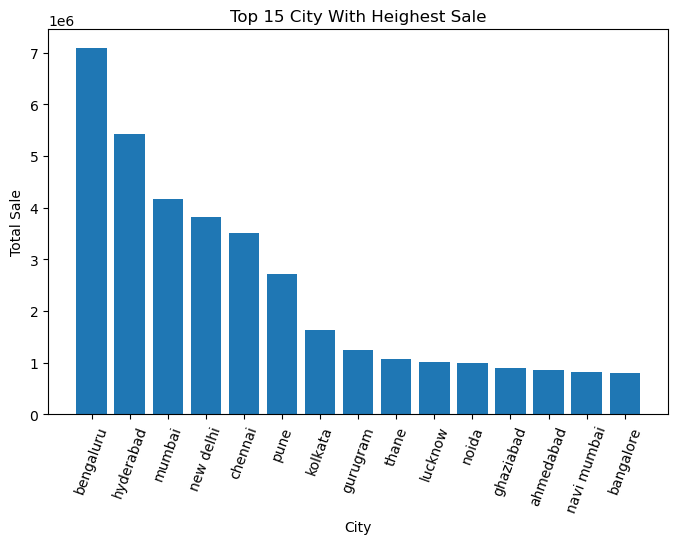

In [41]:
plt.figure(figsize=(8,5))
plt.bar(x = grp_city['ship-city'], height = grp_city['Total_sale'])
plt.xlabel('City')
plt.ylabel('Total Sale')
plt.title('Top 15 City With Heighest Sale')
plt.xticks(rotation=70)
plt.show()

below are the top 15 cities with heighest sale
0 	bengaluru 	7092535.0
1 	hyderabad 	5428255.0
2 	mumbai 	4166577.0
3 	new delhi 	3813813.0
4 	chennai 	3499976.0
5 	pune 	2716463.0
6 	kolkata 	1626874.0
7 	gurugram 	1249639.0
8 	thane 	1071452.0
9 	lucknow 	1006986.0
10 	noida 	987473.0
11 	ghaziabad 	900109.0
12 	ahmedabad 	863406.0
13 	navi mumbai 	824016.0
14 	bangalore 	806748.0

In [43]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'Total_sale'],
      dtype='object')

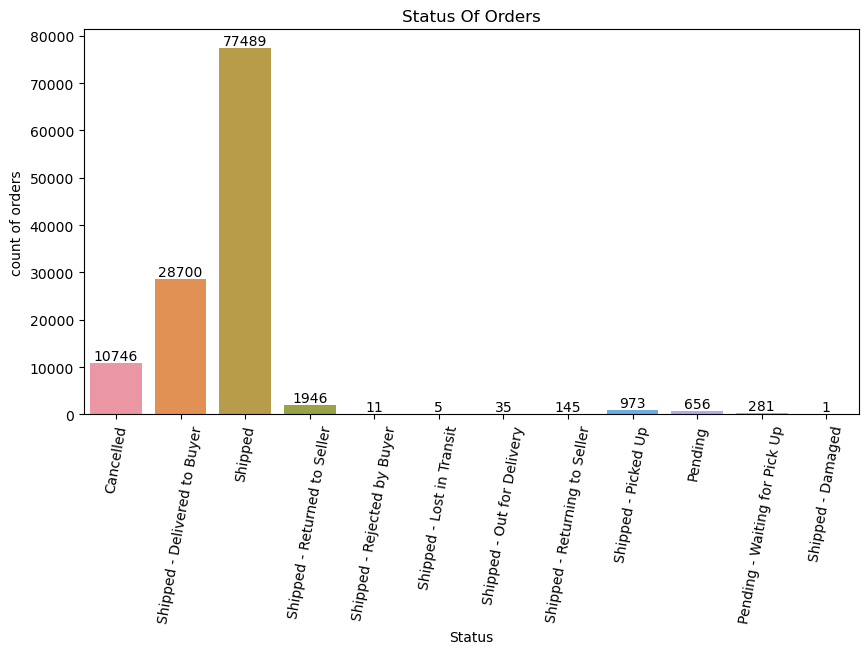

In [45]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'Status', data = df)
ax.bar_label(ax.containers[0])
plt.ylabel('count of orders')
plt.title('Status Of Orders')
plt.xticks(rotation=80)
plt.show()

out of total orders 120988,
10746 are cancelled, 28700 are delivered and 77489 are shipped

In [47]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Total_sale
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,mumbai,maharashtra,400081,IN,False,0.0
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,bengaluru,karnataka,560085,IN,False,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,navi mumbai,maharashtra,410210,IN,True,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,puducherry,puducherry,605008,IN,False,0.0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,chennai,tamil nadu,600073,IN,False,574.0


In [50]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

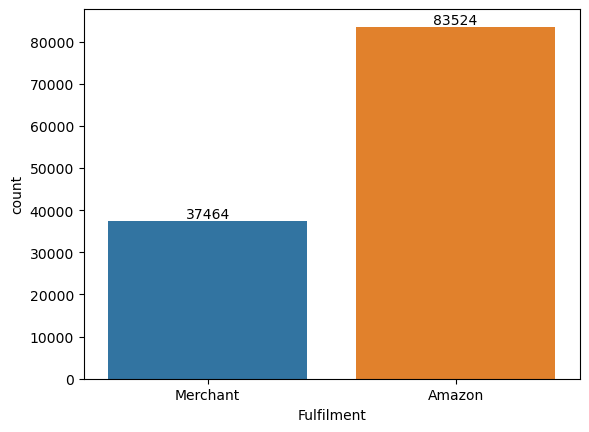

In [52]:
ax = sns.countplot(x = 'Fulfilment', data=df)
ax.bar_label(ax.containers[0])
plt.show()


out of total orders 120988,
37464 order are fullfilled by merchant and 83524 are fullfilled by amazon itself

In [55]:
df['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

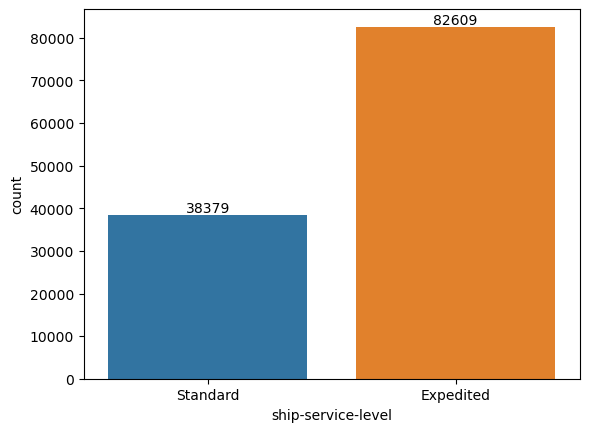

In [57]:
ax = sns.countplot(x='ship-service-level', data=df)
ax.bar_label(ax.containers[0])
plt.show()

out of total orders 120988,
82609 have used expedited ship service level and 38379 have standard ship-service-level

In [60]:
df['Sales Channel'].unique()

array(['Amazon.in'], dtype=object)

In [62]:
df['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [64]:
grp_category = df.groupby('Category')['Total_sale'].sum().reset_index()

In [66]:
grp_category

,Category,Total_sale
0,Blazzer,10700399.0
1,Perfume,761151.0
2,Shirt,20640433.0
3,Shoes,125767.0
4,Socks,142870.0
5,T-shirt,37876077.0
6,Trousers,5235464.0
7,Wallet,441259.0
8,Watch,915.0


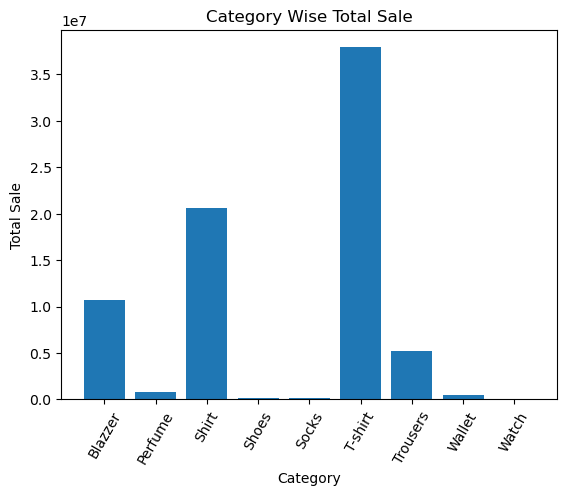

In [68]:
plt.bar(x = grp_category['Category'], height= grp_category['Total_sale'])
# plt.bar_label(ax)
plt.xlabel('Category')
plt.ylabel('Total Sale')
plt.title('Category Wise Total Sale')
plt.xticks(rotation=60)
plt.show()

category wise total sale. Tshirt has heighest sale followed by shirt, Blazzer, trousers
0 	Blazzer 	10700399.0
1 	Perfume 	761151.0
2 	Shirt 	20640433.0
3 	Shoes 	125767.0
4 	Socks 	142870.0
5 	T-shirt 	37876077.0
6 	Trousers 	5235464.0
7 	Wallet 	441259.0
8 	Watch 	915.0

In [71]:

grp_category_count = df.groupby('Category')['Quantity'].count().sort_values(ascending=False).reset_index()

In [73]:
grp_category_count

,Category,Quantity
0,T-shirt,46969
1,Shirt,46628
2,Blazzer,14693
3,Trousers,10149
4,Perfume,1091
5,Wallet,881
6,Socks,419
7,Shoes,155
8,Watch,3


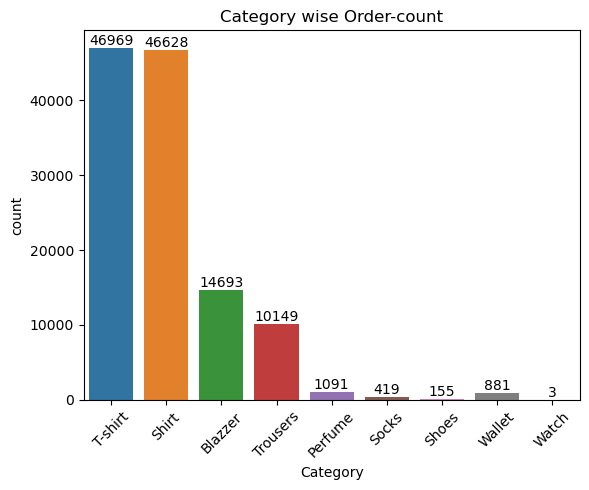

In [75]:
ax = sns.countplot(x = 'Category', data=df)
ax.bar_label(ax.containers[0])
plt.title('Category wise Order-count')
plt.xticks(rotation=45)
plt.show()


above observation shows that most of the buyers are buying Thirts, shirts 

In [78]:
grp_size = df.groupby('Size')['Quantity'].count().sort_values(ascending=False).reset_index()
grp_size


,Size,Quantity
0,M,20942
1,L,20452
2,XL,19391
3,XXL,16764
4,S,15624
5,3XL,13869
6,XS,10179
7,Free,2130
8,6XL,705
9,5XL,526


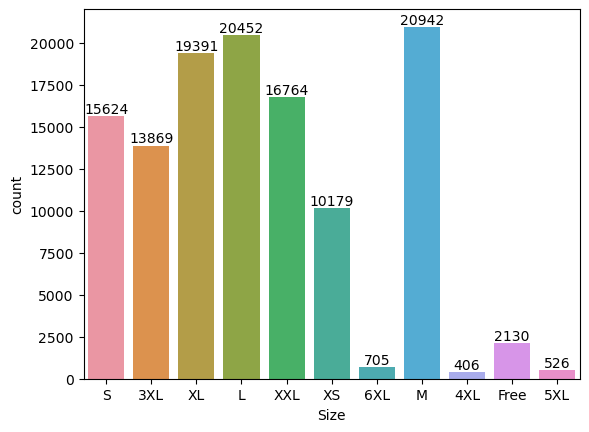

In [80]:
ax = sns.countplot(x ='Size', data=df)
ax.bar_label(ax.containers[0])
plt.show()

Note: From above Graph you can see that most of the Qty buys M-Size in the sales

In [83]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Total_sale
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,mumbai,maharashtra,400081,IN,False,0.0
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,bengaluru,karnataka,560085,IN,False,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,navi mumbai,maharashtra,410210,IN,True,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,puducherry,puducherry,605008,IN,False,0.0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,chennai,tamil nadu,600073,IN,False,574.0


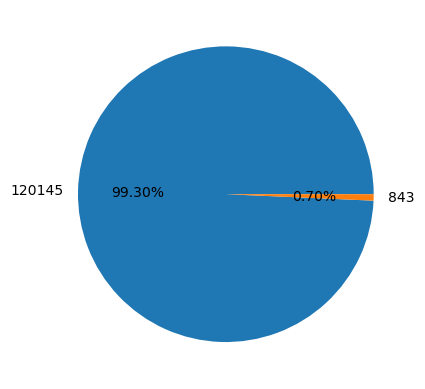

In [93]:
b2b = df['B2B'].value_counts()
plt.pie(b2b, labels = b2b, autopct='%1.2f%%')
plt.show()

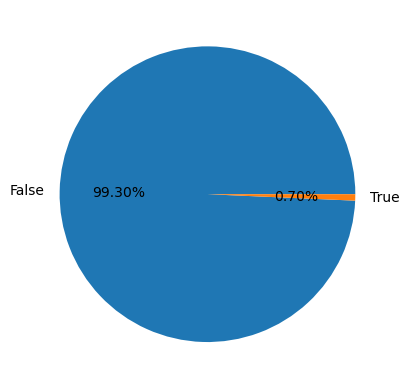

In [95]:
b2b = df['B2B'].value_counts()
plt.pie(b2b, labels = b2b.index, autopct='%1.2f%%')
plt.show()

 above piechart shows that 99% buyers are retailers and 0.7% buyers are B2B